# Indian credit risk(default)

# Problem Statement

In [52]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

# Importing the dataset

In [53]:
df = pd.read_csv('Company(FRA).csv')

## Glimpse of Data

In [54]:
df.head()

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
0,1,395.30,827.60,336.50,534.10,13.50,508.70,38.90,124.40,64.60,...,5.65,3.99,3.37,14.87,8760056.00,10.00,4.44,4.44,827.60,NaN
1,2,36.20,67.70,24.30,137.90,-3.70,131.00,3.20,5.50,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.70,NaN
2,3,84.00,238.40,78.90,331.20,-18.10,309.20,3.90,25.80,10.50,...,2.51,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.40,NaN
3,4,2041.40,6883.50,1443.30,8448.50,212.20,8482.40,178.30,418.40,185.10,...,1.91,18.14,18.62,11.11,10000000.00,10.00,17.60,17.60,6883.50,NaN
4,5,41.80,90.90,47.00,388.60,3.40,392.70,-0.70,7.20,-0.60,...,68.00,45.87,28.67,19.93,107315.00,100.00,-6.52,-6.52,90.90,NaN


In [55]:
df.tail()

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
4251,4252,0.20,0.40,0.20,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.40,NaN
4252,4253,93.30,159.60,86.70,172.90,0.10,169.70,3.30,18.40,3.70,...,1.80,11.00,8.28,9.88,8162700.00,10.00,0.42,0.42,159.60,16.81
4253,4254,932.20,833.80,664.60,2314.70,32.10,2151.60,195.20,348.40,303.00,...,6.08,59.28,31.14,9.87,7479762.00,10.00,26.58,26.58,833.80,5.69
4254,4255,64.60,95.00,48.50,110.50,4.60,113.50,1.60,9.70,2.60,...,3.71,78.99,11.51,14.95,NaN,NaN,0.00,0.00,95.00,NaN
4255,4256,0.00,384.60,111.30,345.80,11.30,341.70,15.40,57.60,20.70,...,4.71,53.37,8.33,3.74,960000.00,10.00,15.63,15.63,384.60,NaN


## Fixing messy column names (containing spaces) for ease of use

In [56]:
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('.','').str.replace('%', 'perc_').str.replace('/', '_to_').str.replace('[','').str.replace(']','')

In [57]:
df.head()

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
0,1,395.30,827.60,336.50,534.10,13.50,508.70,38.90,124.40,64.60,...,5.65,3.99,3.37,14.87,8760056.00,10.00,4.44,4.44,827.60,NaN
1,2,36.20,67.70,24.30,137.90,-3.70,131.00,3.20,5.50,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.70,NaN
2,3,84.00,238.40,78.90,331.20,-18.10,309.20,3.90,25.80,10.50,...,2.51,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.40,NaN
3,4,2041.40,6883.50,1443.30,8448.50,212.20,8482.40,178.30,418.40,185.10,...,1.91,18.14,18.62,11.11,10000000.00,10.00,17.60,17.60,6883.50,NaN
4,5,41.80,90.90,47.00,388.60,3.40,392.70,-0.70,7.20,-0.60,...,68.00,45.87,28.67,19.93,107315.00,100.00,-6.52,-6.52,90.90,NaN


In [58]:
df.columns 

Index(['Num', 'Networth_Next_Year', 'Total_assets', 'Net_worth',
       'Total_income', 'Change_in_stock', 'Total_expenses', 'Profit_after_tax',
       'PBDITA', 'PBT', 'Cash_profit', 'PBDITA_as_perc__of_total_income',
       'PBT_as_perc__of_total_income', 'PAT_as_perc__of_total_income',
       'Cash_profit_as_perc__of_total_income', 'PAT_as_perc__of_net_worth',
       'Sales', 'Income_from_fincial_services', 'Other_income',
       'Total_capital', 'Reserves_and_funds', 'Borrowings',
       'Current_liabilities_&_provisions', 'Deferred_tax_liability',
       'Shareholders_funds', 'Cumulative_retained_profits', 'Capital_employed',
       'TOL_to_TNW', 'Total_term_liabilities__to__tangible_net_worth',
       'Contingent_liabilities__to__Net_worth_perc_', 'Contingent_liabilities',
       'Net_fixed_assets', 'Investments', 'Current_assets',
       'Net_working_capital', 'Quick_ratio_times', 'Current_ratio_times',
       'Debt_to_equity_ratio_times', 'Cash_to_current_liabilities_times',
  

Now, let us check the number of rows (observations) and the number of columns (variables)

In [59]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 4256 
The number of columns (variables) is 51


## Checking datatype of all columns

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Num                                             4256 non-null   int64  
 1   Networth_Next_Year                              4256 non-null   float64
 2   Total_assets                                    4256 non-null   float64
 3   Net_worth                                       4256 non-null   float64
 4   Total_income                                    4025 non-null   float64
 5   Change_in_stock                                 3706 non-null   float64
 6   Total_expenses                                  4091 non-null   float64
 7   Profit_after_tax                                4102 non-null   float64
 8   PBDITA                                          4102 non-null   float64
 9   PBT                                      

Now, let us check the basic measures of descriptive statistics for the continuous variables

In [61]:
df.describe()

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
count,4256.00,4256.00,4256.00,4256.00,4025.00,3706.00,4091.00,4102.00,4102.00,4102.00,...,3871.00,3382.00,3492.00,3828.00,3446.00,3446.00,4256.00,4256.00,4256.00,1629.00
mean,2128.50,1344.74,3573.62,1351.95,4688.19,43.70,4356.30,295.05,605.94,410.26,...,17.93,84.37,28.68,17.73,23764909.56,-1094.83,-196.22,-197.53,3573.62,55.46
std,1228.75,15936.74,30074.44,12961.31,53918.95,436.92,51398.09,3079.90,5646.23,4217.42,...,90.16,562.64,169.65,343.13,170979041.33,34101.36,13061.95,13061.93,30074.44,1304.45
min,1.00,-74265.60,0.10,0.00,0.00,-3029.40,-0.10,-3908.30,-440.70,-3894.80,...,0.00,-0.09,-0.18,-2.00,-2147483647.00,-999998.90,-843181.82,-843181.82,0.10,-1116.64
25%,1064.75,3.98,91.30,31.48,107.10,-1.80,96.80,0.50,6.93,0.80,...,3.81,8.19,5.10,3.02,1308382.50,10.00,0.00,0.00,91.30,2.97
50%,2128.50,72.10,315.50,104.80,455.10,1.60,426.80,9.00,36.90,12.60,...,6.47,17.32,9.86,6.41,4750000.00,10.00,1.49,1.24,315.50,8.69
75%,3192.25,330.82,1120.80,389.85,1485.00,18.40,1395.70,53.30,158.70,74.17,...,11.85,40.01,20.24,11.82,10906020.00,10.00,10.00,7.62,1120.80,17.00
max,4256.00,805773.40,1176509.20,613151.60,2442828.20,14185.50,2366035.30,119439.10,208576.50,145292.60,...,3135.20,17947.60,5651.40,21092.00,4130400545.00,100000.00,34522.53,34522.53,1176509.20,51002.74


In [62]:
pd.options.display.float_format = '{:.2f}'.format   

df.describe()

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
count,4256.00,4256.00,4256.00,4256.00,4025.00,3706.00,4091.00,4102.00,4102.00,4102.00,...,3871.00,3382.00,3492.00,3828.00,3446.00,3446.00,4256.00,4256.00,4256.00,1629.00
mean,2128.50,1344.74,3573.62,1351.95,4688.19,43.70,4356.30,295.05,605.94,410.26,...,17.93,84.37,28.68,17.73,23764909.56,-1094.83,-196.22,-197.53,3573.62,55.46
std,1228.75,15936.74,30074.44,12961.31,53918.95,436.92,51398.09,3079.90,5646.23,4217.42,...,90.16,562.64,169.65,343.13,170979041.33,34101.36,13061.95,13061.93,30074.44,1304.45
min,1.00,-74265.60,0.10,0.00,0.00,-3029.40,-0.10,-3908.30,-440.70,-3894.80,...,0.00,-0.09,-0.18,-2.00,-2147483647.00,-999998.90,-843181.82,-843181.82,0.10,-1116.64
25%,1064.75,3.98,91.30,31.48,107.10,-1.80,96.80,0.50,6.93,0.80,...,3.81,8.19,5.10,3.02,1308382.50,10.00,0.00,0.00,91.30,2.97
50%,2128.50,72.10,315.50,104.80,455.10,1.60,426.80,9.00,36.90,12.60,...,6.47,17.32,9.86,6.41,4750000.00,10.00,1.49,1.24,315.50,8.69
75%,3192.25,330.82,1120.80,389.85,1485.00,18.40,1395.70,53.30,158.70,74.17,...,11.85,40.01,20.24,11.82,10906020.00,10.00,10.00,7.62,1120.80,17.00
max,4256.00,805773.40,1176509.20,613151.60,2442828.20,14185.50,2366035.30,119439.10,208576.50,145292.60,...,3135.20,17947.60,5651.40,21092.00,4130400545.00,100000.00,34522.53,34522.53,1176509.20,51002.74


# 1.Missing Value Treatment

# checking missing values

In [63]:
df.isnull().sum()

Num                                                  0
Networth_Next_Year                                   0
Total_assets                                         0
Net_worth                                            0
Total_income                                       231
Change_in_stock                                    550
Total_expenses                                     165
Profit_after_tax                                   154
PBDITA                                             154
PBT                                                154
Cash_profit                                        154
PBDITA_as_perc__of_total_income                     79
PBT_as_perc__of_total_income                        79
PAT_as_perc__of_total_income                        79
Cash_profit_as_perc__of_total_income                79
PAT_as_perc__of_net_worth                            0
Sales                                              305
Income_from_fincial_services                      1111
Other_inco

In [64]:
df_missing = df.isnull().sum()

In [65]:
len(df)

4256

In [66]:
df_missing/len(df)

Num                                              0.00
Networth_Next_Year                               0.00
Total_assets                                     0.00
Net_worth                                        0.00
Total_income                                     0.05
Change_in_stock                                  0.13
Total_expenses                                   0.04
Profit_after_tax                                 0.04
PBDITA                                           0.04
PBT                                              0.04
Cash_profit                                      0.04
PBDITA_as_perc__of_total_income                  0.02
PBT_as_perc__of_total_income                     0.02
PAT_as_perc__of_total_income                     0.02
Cash_profit_as_perc__of_total_income             0.02
PAT_as_perc__of_net_worth                        0.00
Sales                                            0.07
Income_from_fincial_services                     0.26
Other_income                

### Imputation of all missing values with the bext possible option¶

In [67]:
impute = ['Total_income','Change_in_stock','Total_expenses','Profit_after_tax','PBDITA','PBT',
          'Cash_profit','PBDITA_as_perc__of_total_income','PBT_as_perc__of_total_income','PAT_as_perc__of_total_income',
          'Cash_profit_as_perc__of_total_income','Sales','Income_from_fincial_services','Other_income','Total_capital',
          'Reserves_and_funds','Borrowings','Current_liabilities_&_provisions','Deferred_tax_liability','Cumulative_retained_profits',
          'Contingent_liabilities','Net_fixed_assets','Investments','Current_assets','Net_working_capital','Quick_ratio_times','Current_ratio_times',
          'Cash_to_current_liabilities_times','Cash_to_average_cost_of_sales_per_day','Creditors_turnover','Debtors_turnover','Finished_goods_turnover',
          'WIP_turnover','Raw_material_turnover','Shares_outstanding','Equity_face_value','PE_on_BSE']
for i in impute:
    df[i].fillna(df[i].median(),inplace=True)

In [68]:
df.isnull().sum()

Num                                               0
Networth_Next_Year                                0
Total_assets                                      0
Net_worth                                         0
Total_income                                      0
Change_in_stock                                   0
Total_expenses                                    0
Profit_after_tax                                  0
PBDITA                                            0
PBT                                               0
Cash_profit                                       0
PBDITA_as_perc__of_total_income                   0
PBT_as_perc__of_total_income                      0
PAT_as_perc__of_total_income                      0
Cash_profit_as_perc__of_total_income              0
PAT_as_perc__of_net_worth                         0
Sales                                             0
Income_from_fincial_services                      0
Other_income                                      0
Total_capita

## checking duplicates in the data

In [69]:
df.duplicated().sum()
print('Number of duplicates present in the dataset are',df.duplicated().sum())

Number of duplicates present in the dataset are 0


In [70]:
df.dtypes.value_counts()

float64    50
int64       1
dtype: int64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Num                                             4256 non-null   int64  
 1   Networth_Next_Year                              4256 non-null   float64
 2   Total_assets                                    4256 non-null   float64
 3   Net_worth                                       4256 non-null   float64
 4   Total_income                                    4256 non-null   float64
 5   Change_in_stock                                 4256 non-null   float64
 6   Total_expenses                                  4256 non-null   float64
 7   Profit_after_tax                                4256 non-null   float64
 8   PBDITA                                          4256 non-null   float64
 9   PBT                                      

## Removal of unwanted variables

In [72]:
df1 = df.drop(['Equity_face_value','PE_on_BSE'], axis = 1)

# 2.Outlier Treatment

In [73]:
# creating a list of column names that are numeric
numcols = [cols for cols in df1.columns if df1[cols].dtype != 'object']
numcols 

['Num',
 'Networth_Next_Year',
 'Total_assets',
 'Net_worth',
 'Total_income',
 'Change_in_stock',
 'Total_expenses',
 'Profit_after_tax',
 'PBDITA',
 'PBT',
 'Cash_profit',
 'PBDITA_as_perc__of_total_income',
 'PBT_as_perc__of_total_income',
 'PAT_as_perc__of_total_income',
 'Cash_profit_as_perc__of_total_income',
 'PAT_as_perc__of_net_worth',
 'Sales',
 'Income_from_fincial_services',
 'Other_income',
 'Total_capital',
 'Reserves_and_funds',
 'Borrowings',
 'Current_liabilities_&_provisions',
 'Deferred_tax_liability',
 'Shareholders_funds',
 'Cumulative_retained_profits',
 'Capital_employed',
 'TOL_to_TNW',
 'Total_term_liabilities__to__tangible_net_worth',
 'Contingent_liabilities__to__Net_worth_perc_',
 'Contingent_liabilities',
 'Net_fixed_assets',
 'Investments',
 'Current_assets',
 'Net_working_capital',
 'Quick_ratio_times',
 'Current_ratio_times',
 'Debt_to_equity_ratio_times',
 'Cash_to_current_liabilities_times',
 'Cash_to_average_cost_of_sales_per_day',
 'Creditors_turnove

In [74]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [75]:
((df1 > UL) | (df1 < LL)).sum()

Num                                                 0
Networth_Next_Year                                624
Total_assets                                      585
Net_worth                                         595
Total_income                                      541
Change_in_stock                                   946
Total_expenses                                    542
Profit_after_tax                                  725
PBDITA                                            612
PBT                                               724
Cash_profit                                       652
PBDITA_as_perc__of_total_income                   366
PBT_as_perc__of_total_income                      559
PAT_as_perc__of_total_income                      623
Cash_profit_as_perc__of_total_income              438
PAT_as_perc__of_net_worth                         427
Sales                                             545
Income_from_fincial_services                      710
Other_income                

In [76]:
# user defined function to get upper and lower bounds of numeric columns for outlier capping and flooring
def get_bounds(df,col):
    q1 = df1[col].quantile(0.25)
    q3 = df1[col].quantile(0.75)
    iqr = q3-q1
    upper_bound = q3 + 1.5*iqr
    lower_bound = q1 - 1.5*iqr
    return upper_bound, lower_bound

In [77]:
for cols in numcols:
        upper_bound, lower_bound = get_bounds(df,cols)
        df1[cols] = np.where(df[cols]>upper_bound, upper_bound, df1[cols])
        df1[cols] = np.where(df[cols]<lower_bound, lower_bound, df1[cols])

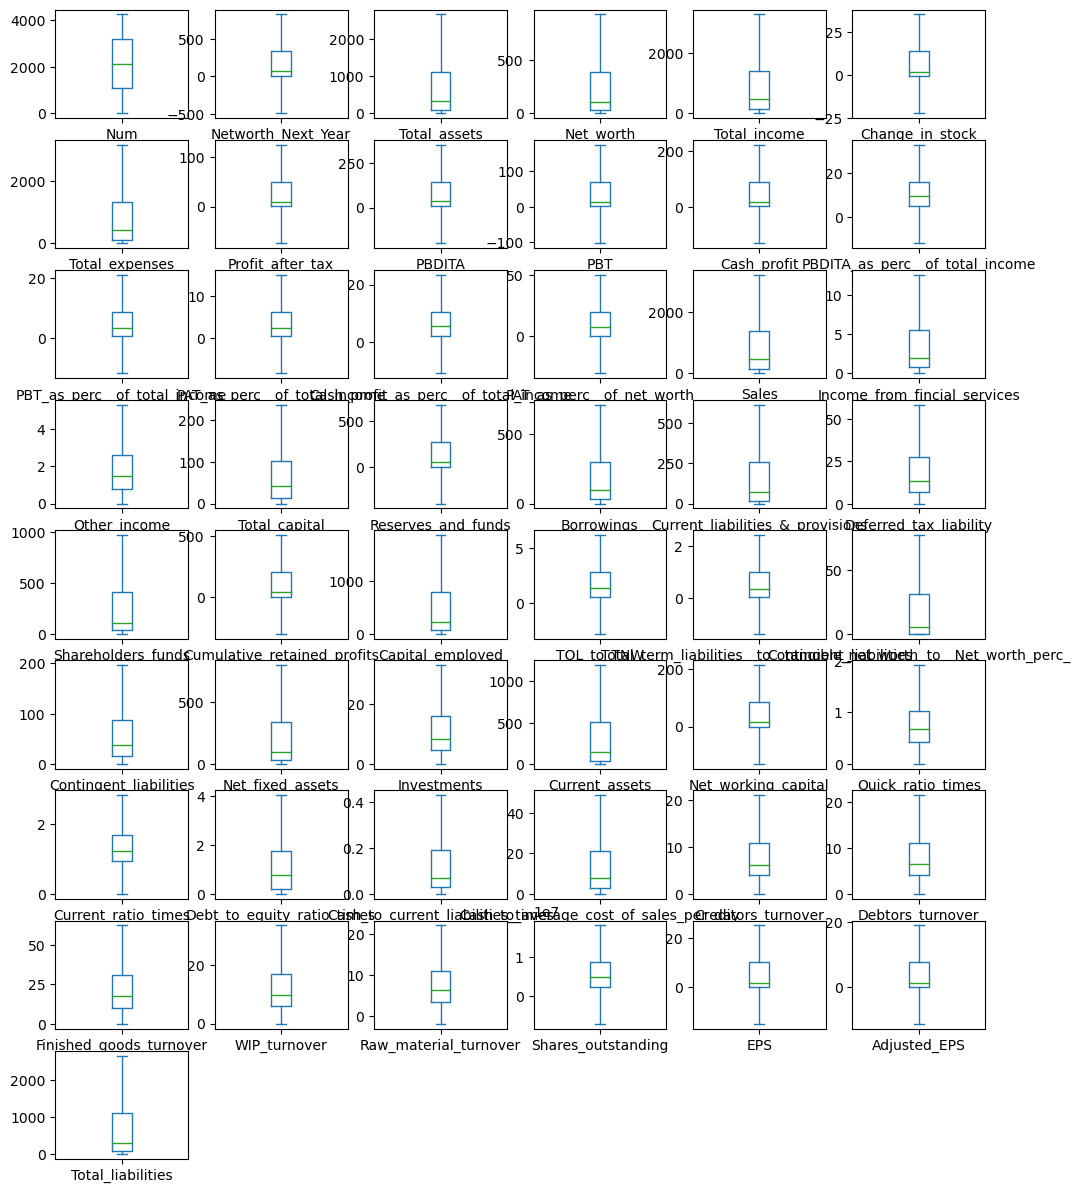

In [80]:
# Check if outliers have been capped using boxplot
df1[numcols].plot(kind='box', subplots=True, layout=(12,6), figsize=(12,20))
plt.show();

### Creating a binary target variable using 'Networth_Next_Year'

In [83]:
df1['default'] = np.where((df1['Networth_Next_Year'] > 0), 0, 1)

In [84]:
df1['default'].value_counts()

0    3352
1     904
Name: default, dtype: int64

### Checking top 10 rows

In [85]:
df1[['default','Networth_Next_Year']].head(10)

,default,Networth_Next_Year
0,0,395.30
1,0,36.20
2,0,84.00
3,0,821.10
4,0,41.80
5,0,291.50
6,0,93.30
7,0,821.10
8,0,188.60
9,0,229.60


### Checking proportion of default

In [86]:
df1['default'].value_counts(normalize = True)

0   0.79
1   0.21
Name: default, dtype: float64

# 3. Checking Correlation amongst the variables using heatmap

### Inspect possible correlations between independent variables

<Figure size 1200x800 with 0 Axes>

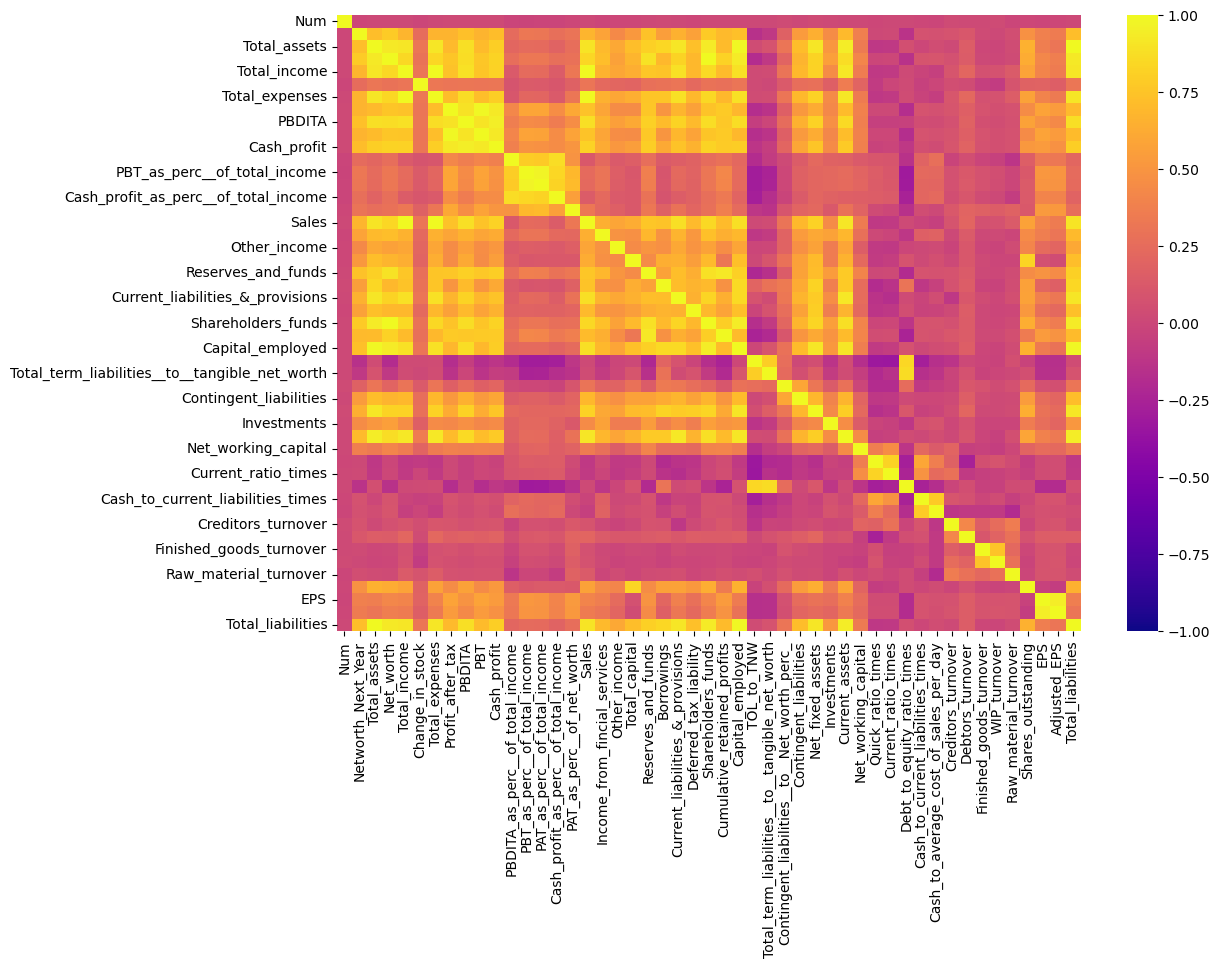

In [88]:
plt.figure(figsize = (12,8))
cor_matrix = df1.drop('default', axis = 1).corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1)
plt.show()

# 4 Train Test Split

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
predictors = df1.drop('default', axis = 1)
response = df1[['default']]

In [95]:
from sklearn.preprocessing import StandardScaler #Scale train and test separately
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [96]:
df_new1 = pd.concat([scaled_predictors, response], axis = 1)

In [97]:
X_train,X_test,Y_train,Y_test = train_test_split(predictors,response,test_size = 0.33,random_state =42, stratify = df_new1.default)

In [98]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',Y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',Y_test.shape)

Number of rows and columns of the training set for the independent variables: (2851, 49)
Number of rows and columns of the training set for the dependent variable: (2851, 1)
Number of rows and columns of the test set for the independent variables: (1405, 49)
Number of rows and columns of the test set for the dependent variable: (1405, 1)


In [99]:
X_train.head()

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Cash_to_average_cost_of_sales_per_day,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,EPS,Adjusted_EPS,Total_liabilities
2893,2894.00,574.50,699.00,537.80,686.00,27.50,692.10,21.40,49.80,22.50,...,15.64,18.88,21.41,15.72,8.46,22.02,4847750.00,3.61,1.80,699.00
4243,4244.00,0.00,1098.70,39.70,914.40,2.40,914.50,2.30,66.70,2.50,...,13.72,4.52,4.65,62.16,33.68,14.02,340000.00,6.76,6.76,1098.70
3345,3346.00,30.60,30.50,30.50,0.30,1.60,8.20,-7.90,0.00,-7.90,...,48.70,6.17,6.47,17.32,9.86,6.41,4750000.00,0.00,0.00,30.50
332,333.00,7.90,17.10,8.50,34.20,-0.30,33.40,0.50,2.00,0.80,...,0.00,14.78,6.09,62.16,33.68,22.02,4750000.00,0.00,0.00,17.10
3265,3266.00,67.70,110.30,64.10,92.20,-1.90,93.20,-2.90,5.10,-2.30,...,13.84,10.04,4.78,11.28,13.38,3.57,489240.00,-7.56,-7.56,110.30


In [100]:
Y_train.head()

,default
2893,0
4243,1
3345,0
332,0
3265,0


In [101]:
X_test.head()

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Cash_to_average_cost_of_sales_per_day,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,EPS,Adjusted_EPS,Total_liabilities
2302,2303.00,161.10,323.30,156.50,616.20,34.00,632.00,18.20,19.30,18.80,...,10.69,3.54,21.41,13.45,12.91,22.02,5171400.00,3.93,3.93,323.30
2296,2297.00,821.10,2083.00,927.41,1942.60,-22.19,1818.40,27.70,126.80,41.20,...,18.75,3.70,6.06,23.03,21.51,5.04,7609900.00,8.28,8.28,2083.00
4075,4076.00,157.20,279.90,115.90,523.30,22.70,487.80,58.20,95.90,89.20,...,13.99,2.81,4.68,62.16,11.98,5.53,12012.00,25.00,19.04,279.90
3416,3417.00,47.00,84.60,43.90,121.60,0.00,117.60,4.00,10.20,6.10,...,0.97,6.20,9.38,49.32,33.68,2.36,4750000.00,0.00,0.00,84.60
3609,3610.00,373.50,709.00,339.80,960.60,20.70,958.50,22.80,70.20,14.80,...,5.99,21.09,11.74,38.67,33.68,14.10,4750000.00,-0.01,-0.01,709.00


In [102]:
Y_test.head()

,default
2302,0
2296,0
4075,0
3416,0
3609,0


# 5. Build Logistic Regression Model (using statsmodel library) on most important variables on Train Dataset and choose the optimum cutoff. Also showcase your model building approach

In [103]:
from sklearn.feature_selection import RFE 

In [104]:
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as SM

### For modeling we will use Logistic Regression with recursive feature elimination

In [105]:
LogR = LogisticRegression()

In [106]:
# we using regression feature elimination total number of feartures are 50 out of we will be selected 15 features
selector = RFE(estimator = LogR, n_features_to_select=15, step=1)

In [107]:
selector = selector.fit(X_train, Y_train)

In [108]:
selector.n_features_

15

In [109]:
selector.ranking_

array([32,  1,  5,  1, 30, 26, 19,  6,  1, 18,  3, 27, 33, 25, 17, 22, 23,
       15,  1, 11,  1, 21,  4, 29, 16,  1,  1,  1,  2, 20, 28,  8,  9, 14,
       24,  1, 10,  1, 34,  1,  1,  7,  1, 31,  1, 35,  1, 12, 13])

In [110]:
df = pd.DataFrame({'Feature': scaled_predictors.columns, 'Rank': selector.ranking_})
df[df['Rank'] == 1]

,Feature,Rank
1,Networth_Next_Year,1
3,Net_worth,1
8,PBDITA,1
18,Other_income,1
20,Reserves_and_funds,1
25,Cumulative_retained_profits,1
26,Capital_employed,1
27,TOL_to_TNW,1
35,Quick_ratio_times,1
37,Debt_to_equity_ratio_times,1


# 6. Checking the accuracy of the model using confusion matrix for training set  

In [111]:
from sklearn.metrics import classification_report, recall_score,precision_score,f1_score 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [112]:
pred_train = selector.predict(X_train)
pred_test = selector.predict(X_test)

## Train data

In [113]:
print(confusion_matrix(Y_train, pred_train))

[[2237    8]
 [   0  606]]


In [114]:
print(classification_report(Y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2245
           1       0.99      1.00      0.99       606

    accuracy                           1.00      2851
   macro avg       0.99      1.00      1.00      2851
weighted avg       1.00      1.00      1.00      2851



## Performance Matrix on train data set

In [115]:
log_train_predict =selector.predict(X_train)
log_train_score = selector.score(X_train, Y_train) # acc score
log_train_recall_score = recall_score(Y_train,log_train_predict)
log_train_precision_score = precision_score(Y_train,log_train_predict)
log_train_f1_score = f1_score(Y_train,log_train_predict)
log_train_auc=roc_auc_score(Y_train,selector.predict_proba(X_train)[:,1])
print(log_train_score,log_train_recall_score,log_train_precision_score,log_train_f1_score,log_train_auc)

0.9971939670291126 1.0 0.9869706840390879 0.9934426229508196 0.9999220857497777


## ROC Curve

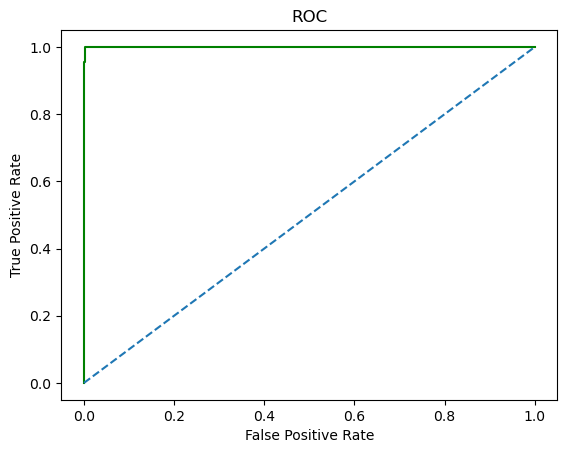

Area under Curve is 0.9999220857497777


In [116]:
log_train_fpr, log_train_tpr,_=roc_curve(Y_train,selector.predict_proba(X_train)[:,1])
plt.plot(log_train_fpr,log_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show();
print('Area under Curve is', log_train_auc)

# 7.Checking the accuracy of the model using confusion matrix for test set

## Test data

In [117]:
print(confusion_matrix(Y_test, pred_test))

[[1102    5]
 [   1  297]]


In [118]:
print(classification_report(Y_test, pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1107
           1       0.98      1.00      0.99       298

    accuracy                           1.00      1405
   macro avg       0.99      1.00      0.99      1405
weighted avg       1.00      1.00      1.00      1405



## Performance Matrix on test data set

In [119]:
log_test_predict = selector.predict(X_test)
log_test_score = selector.score(X_test, Y_test)
log_test_recall_score = recall_score(Y_test,log_test_predict)
log_test_precision_score = precision_score(Y_test,log_test_predict)
log_test_f1_score = f1_score(Y_test,log_test_predict)
log_test_auc=roc_auc_score(Y_train,selector.predict_proba(X_train)[:,1])
print(log_test_score,log_test_recall_score,log_test_precision_score,log_test_f1_score,log_test_auc)

0.995729537366548 0.9966442953020134 0.9834437086092715 0.99 0.9999220857497777


## ROC Curve

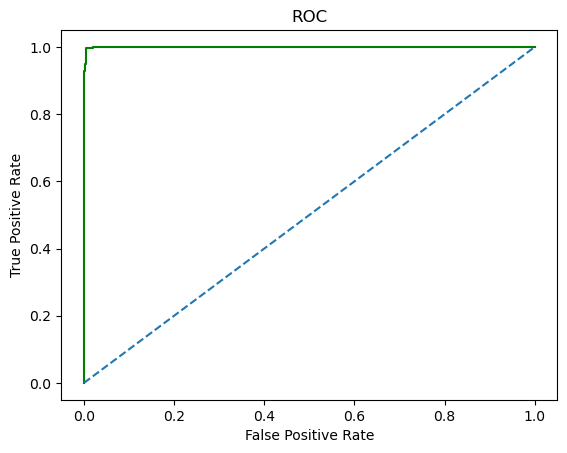

Area under Curve is 0.9999220857497777


In [120]:
log_test_fpr, log_test_tpr,_=roc_curve(Y_test,selector.predict_proba(X_test)[:,1])
plt.plot(log_test_fpr,log_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show();
print('Area under Curve is', log_test_auc)

# 8. Build a Random Forest Model on Train Dataset. Also showcase your model building approach

## Random Forest

In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
param_grid = {
    'max_depth': [10,15,20],## 10,15,20
    'max_features': [4,6,8],## 4,6,8
    'min_samples_leaf': [25,50,100],## 50,100
    'min_samples_split': [25,50,100], ## 25,50,100
    'n_estimators': [100,200] ## 100,200
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5)

In [123]:
grid_search.fit(X_train, Y_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 25, 'min_samples_split': 25, 'n_estimators': 100}


RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=25,
                       min_samples_split=25, random_state=42)

In [124]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 25,
 'min_samples_split': 25,
 'n_estimators': 100}

In [125]:
best_grid = grid_search.best_estimator_

In [126]:
best_grid

RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=25,
                       min_samples_split=25, random_state=42)

In [127]:
#Predicting the Training and Testing data
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## Train data

## Performance Matrix on train data set

In [128]:
#RF Model evaluation on Train Data
confusion_matrix(Y_train,ytrain_predict)

array([[2245,    0],
       [   0,  606]], dtype=int64)

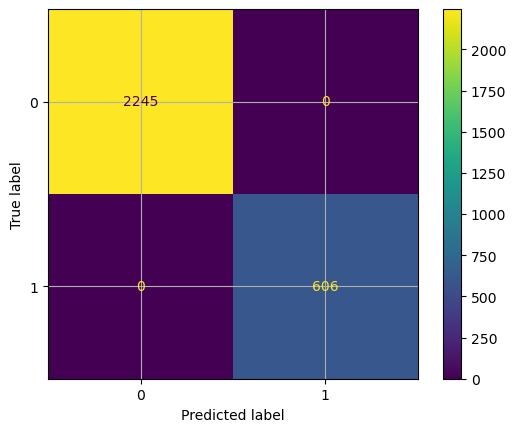

In [129]:
ConfusionMatrixDisplay.from_estimator(grid_search,X_train,Y_train)
plt.grid()
plt.show();

In [130]:
rf_train_acc=best_grid.score(X_train, Y_train) 
rf_train_acc

1.0

In [131]:
print(classification_report(Y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2245
           1       1.00      1.00      1.00       606

    accuracy                           1.00      2851
   macro avg       1.00      1.00      1.00      2851
weighted avg       1.00      1.00      1.00      2851



In [132]:
rf_train_predict = best_grid.predict(X_train)
rf_train_score = grid_search.score(X_train, Y_train) # acc score
rf_train_recall_score = recall_score(Y_train,rf_train_predict)
rf_train_precision_score = precision_score(Y_train,rf_train_predict)
rf_train_f1_score = f1_score(Y_train,rf_train_predict)
print(rf_train_score,rf_train_recall_score,rf_train_precision_score,rf_train_f1_score)

1.0 1.0 1.0 1.0


## ROC Curve

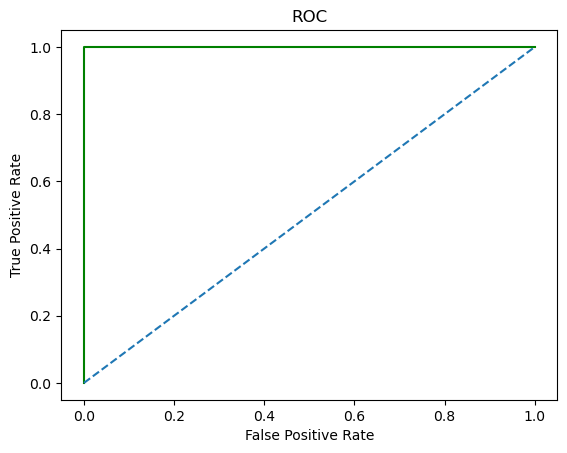

Area under Curve is 1.0


In [133]:
rf_train_fpr, rf_train_tpr,_=roc_curve(Y_train,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show();
rf_train_auc=roc_auc_score(Y_train,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

# 9. Validate the Random Forest Model on test Dataset and state the performance matrices. Also state interpretation from the model

### RF Model evaluation on Test Data

In [134]:
confusion_matrix(Y_test,ytest_predict)

array([[1107,    0],
       [   0,  298]], dtype=int64)

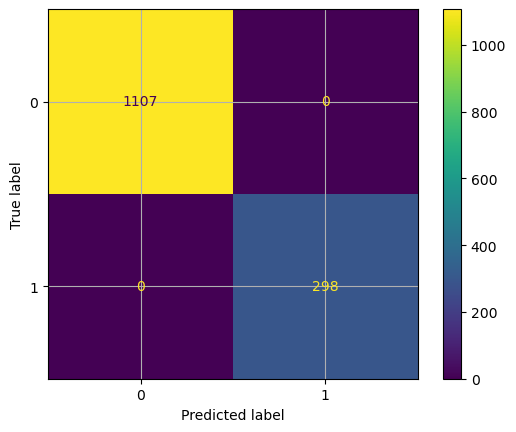

In [135]:
ConfusionMatrixDisplay.from_estimator(grid_search,X_test,Y_test)
plt.grid()
plt.show();

In [136]:
rf_test_acc=best_grid.score(X_test,Y_test)
rf_test_acc

1.0

In [137]:
print(classification_report(Y_test,ytest_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1107
           1       1.00      1.00      1.00       298

    accuracy                           1.00      1405
   macro avg       1.00      1.00      1.00      1405
weighted avg       1.00      1.00      1.00      1405



In [138]:
rf_test_predict = best_grid.predict(X_test)
rf_test_score = grid_search.score(X_test, Y_test) # acc score
rf_test_recall_score = recall_score(Y_test,rf_test_predict)
rf_test_precision_score = precision_score(Y_test,rf_test_predict)
rf_test_f1_score = f1_score(Y_test,rf_test_predict)
print(rf_test_score,rf_test_recall_score,rf_test_precision_score,rf_test_f1_score)

1.0 1.0 1.0 1.0


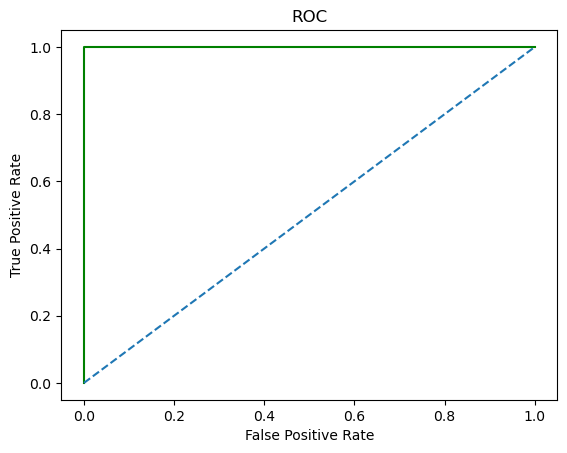

Area under Curve is 1.0


In [139]:
rf_test_fpr, rf_test_tpr,_=roc_curve(Y_test,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show();
rf_test_auc=roc_auc_score(Y_test,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

# 10.  Comparison of Random Forest model with logistic regression model

# Comparison of the performance metrics from the 2 models

In [140]:
index=['Accuracy','Recall','Precision','F1 Score','AUC']
data = pd.DataFrame({'Logistic Train':[log_train_score,log_train_recall_score,log_train_precision_score,log_train_f1_score,log_train_auc],
        'Logistic Test':[log_test_score,log_test_recall_score,log_test_precision_score,log_test_f1_score,log_test_auc],
       'Random Forest Train':[rf_train_score,rf_train_recall_score,rf_train_precision_score,rf_train_f1_score,rf_train_auc],
        'Random Forest Test':[rf_test_score,rf_test_recall_score,rf_test_precision_score,rf_test_f1_score,rf_test_auc]},index=index)
round(data,2)

,Logistic Train,Logistic Test,Random Forest Train,Random Forest Test
Accuracy,1.00,1.00,1.00,1.00
Recall,1.00,1.00,1.00,1.00
Precision,0.99,0.98,1.00,1.00
F1 Score,0.99,0.99,1.00,1.00
AUC,1.00,1.00,1.00,1.00


# ROC Curve for the 2 models on the Training data

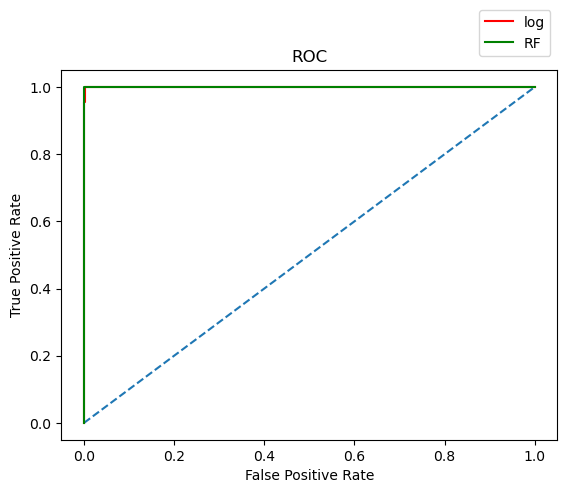

In [141]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(log_train_fpr, log_train_tpr,color='red',label="log")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
plt.show()

# ROC Curve for the 3 models on the Test data

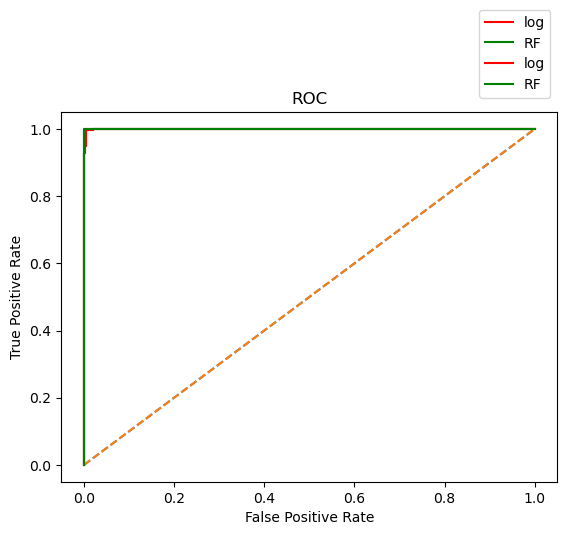

In [143]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(log_test_fpr, log_test_tpr,color='red',label="log")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
plt.show()

# END